# Wind Data EDA

In [11]:
# Specify which computer: 'gdrive', 'local', or 'work'
path_source = 'work'

Imports

In [2]:
if path_source == 'gdrive':
  from IPython.display import clear_output
  !pip install cartopy
  !pip install -U kaleido # need this for saving plotly to png
  clear_output()

In [12]:
import pandas as pd 
import numpy as np
import os 
import datetime
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as mticker
import plotly.express as px

from netCDF4 import Dataset
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# import dotenv

Set paths:

In [13]:
if path_source == 'gdrive':
  from google.colab import drive
  drive.mount('/content/gdrive')
  gdrive_path = '/content/gdrive/MyDrive/Classes/W210_capstone'
  env_path = '/content/gdrive/MyDrive/.env'
  
elif path_source == 'local':
  gdrive_path = '/Users/tj/trevorj@berkeley.edu - Google Drive/My Drive/Classes/W210_capstone'
  env_path = '/Users/tj/trevorj@berkeley.edu - Google Drive/MyDrive/.env'

elif path_source == 'work':
  gdrive_path = '/Users/trevorjohnson/trevorj@berkeley.edu - Google Drive/My Drive/Classes/W210_capstone'
  env_path = '/Users/trevorjohnson/trevorj@berkeley.edu - Google Drive/My Drive/.env'
  

wind_path = os.path.join(gdrive_path, 'W210 Capstone/Data/wind')
plotly_out = os.path.join(gdrive_path, 'W210_capstone/plotly_gif')
os.chdir(os.path.join(gdrive_path, 'JLPS_capstone_project/data_clean_scripts/wind'))

Mapbox token:

In [ ]:
from dotenv import dotenv_values
api_keys = dotenv_values(env_path)
mapbox_key = api_keys['mapbox']
px.set_mapbox_access_token(open(mapbox_key).read())

In [6]:
df = pd.read_parquet(wind_path)
df

,lat,lon,ZCTA10,u,v,wdir,wspd,year_month
0,37.465,-117.936,89010,0.815439,0.606772,36.653091,1.016421,199801
1,35.396,-116.322,89019,0.282826,0.555248,63.007133,0.623130,199801
2,36.161,-116.139,89060,-0.143215,0.582321,103.816978,0.599673,199801
3,35.957,-115.897,89061,0.381607,0.403891,46.624981,0.555654,199801
4,39.520,-120.032,89439,0.947113,1.138490,50.242836,1.480940,199801
...,...,...,...,...,...,...,...,...
449070,39.061,-120.210,96145,-0.003084,0.415663,90.425072,0.415674,202012
449071,39.149,-120.248,96146,-0.003084,0.415663,90.425072,0.415674,202012
449072,39.236,-120.062,96148,-0.003084,0.415663,90.425072,0.415674,202012
449073,38.732,-120.033,96150,-0.139579,0.199844,124.932045,0.243762,202012


In [7]:
# df['date'] = df['year_month'].map(lambda x: datetime.datetime.strptime(x, "%Y%m"))
df['date'] = df['year_month'].map(lambda x: x[:4] + '-' + x[4:])

# Plotly Map
- This package does not support putting arrows out of the box to signify wind direction. 
- But the color can signify wind direction
- Plotly won't render in github, so here's a screenshot of this plotting option. You can click, drag, and hover on points to get wind info. The color represents wind direction. And dot size represents speed. Probably not the best data representation, but a simple way to do it with this package. 

In [ ]:
df_small = df[df['year_month'] == '200702']
fig = px.scatter_mapbox(df_small, lat="lat", lon="lon", 
  color="wdir", size="wspd",
  color_continuous_scale=px.colors.cyclical.IceFire, 
  size_max=15, zoom=5)
fig.show()

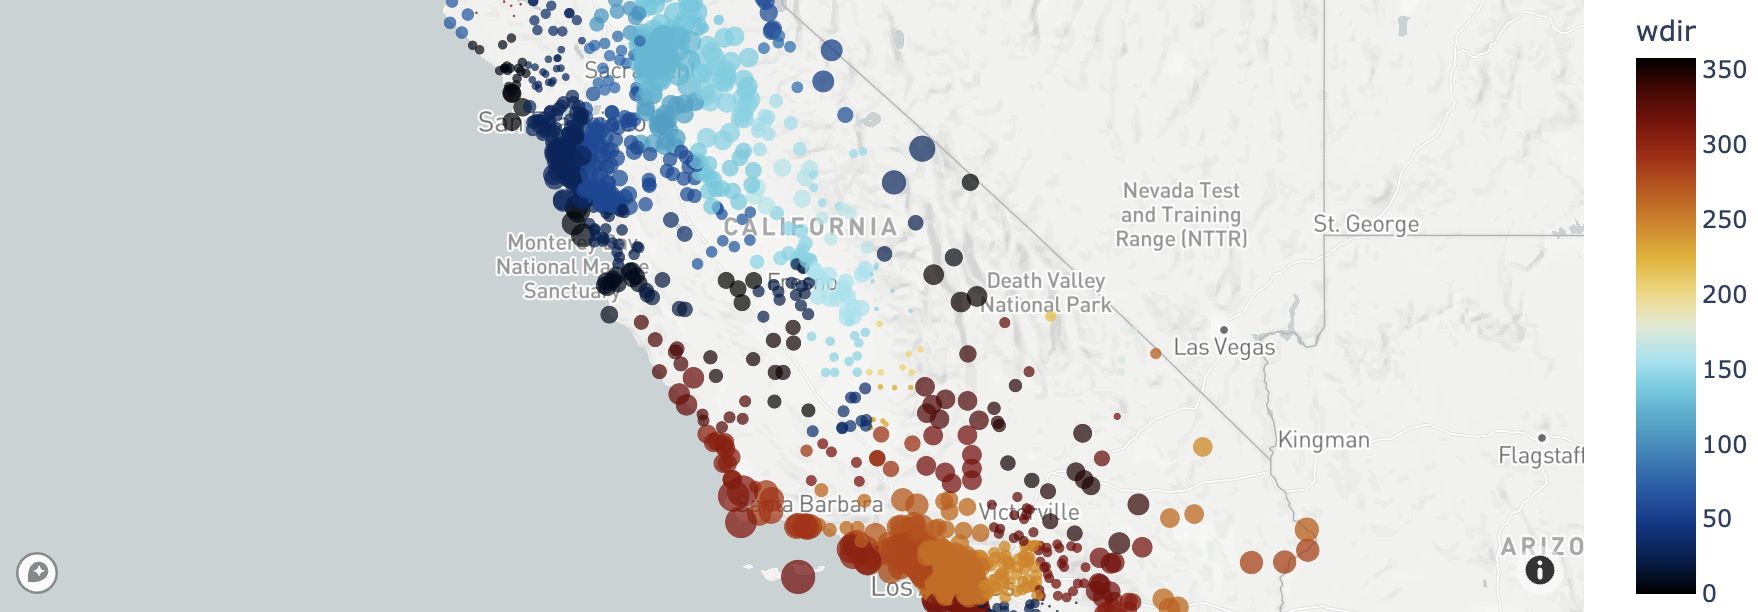

In [ ]:
from IPython.display import Image
Image('plotly_wind_map.png')

Animation

In [ ]:
fig = px.scatter_mapbox(df, lat="lat", lon="lon", 
  color="wdir", size="wspd",
  color_continuous_scale=px.colors.cyclical.IceFire, 
  # color_continuous_scale=px.colors.cyclical.Edge, 
  range_color=[0, 360],
  animation_frame='date',
  size_max=15, zoom=5, 
  width=700, height=800)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

Save images as gif to put in gslides.

In [ ]:
all_dates = list(set(df[df.date.str.count('2010-')>0]['date'].to_list()))
# all_dates = list(set(df.date.to_list()))

for date_i in tqdm(all_dates):
  df_plot = df[df.date == date_i]

  fig = px.scatter_mapbox(df_plot, lat="lat", lon="lon", 
    color="wdir", size="wspd",
    color_continuous_scale=px.colors.cyclical.IceFire, 
    range_color=[0, 360],
    title=f'Date: {date_i}',
    size_max=15, zoom=5, 
    width=700, height=800)

  fig.write_image(os.path.join(plotly_out, f'plot_{date_i}.png'))

  0%|          | 0/12 [00:00<?, ?it/s]

In [ ]:
from PIL import Image
 
# Open the images
frames = []
files = os.listdir(plotly_out)
files.sort()
files = [os.path.join(plotly_out, i) for i in files]
for i in files:
  new_frame = Image.open(i)
  frames.append(new_frame)

# Save into a GIF file that loops forever
gif_file = os.path.join(plotly_out, 'gif1.gif')
frames[0].save(gif_file, format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=300, loop=0)

In [ ]:
from IPython.display import Image
Image(filename=gif_file)

Output hidden; open in https://colab.research.google.com to view.

# Matplotlib map
- This method keeps crashing my google colab... And the cartopy package won't install on my mac m1. So I may have to just go with the plotly version. 

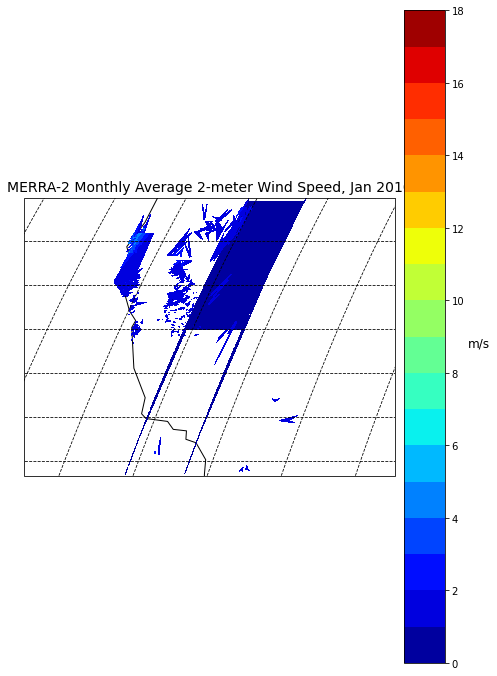

In [73]:
df_small = df[df.date == '2010-01']
lon, lat = np.meshgrid(df_small.lon, df_small.lat)
ws_direction = np.arctan2(df_small['v'],df_small['u'])

ws_daily_avg = np.nanmean(df_small.wspd, axis=0)
ws_daily_avg = df_small.wspd

ws = np.array(np.sqrt(df_small['u']**2+df_small['v']**2))
wspd2 = []
for i,val in enumerate(df_small.wspd):
  x = np.zeros(df_small.shape[0])
  x[i] = val 
  wspd2.append(x)

fig = plt.figure(figsize=(8,15)) 
ax = plt.axes(projection=ccrs.Robinson())

# zoom in to CA
ax.set_extent([-124.4, -114.2, 32.5, 42], crs=ccrs.PlateCarree())

ax.coastlines(resolution='110m', linewidth=1)
ax.gridlines(linestyle='--', color='black')

clevs = np.arange(0, 19, 1)
# plt.contourf(lon, lat, ws_daily_avg, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
#plt.contourf(lon, lat, ws, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.contourf(lon, lat, wspd2, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)


plt.title('MERRA-2 Monthly Average 2-meter Wind Speed, Jan 2010', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)

In [79]:
ws2.dim

AttributeError: 'list' object has no attribute 'dim'

/opt/miniconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/miniconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


TypeError: Input z must be 2D, not 1D

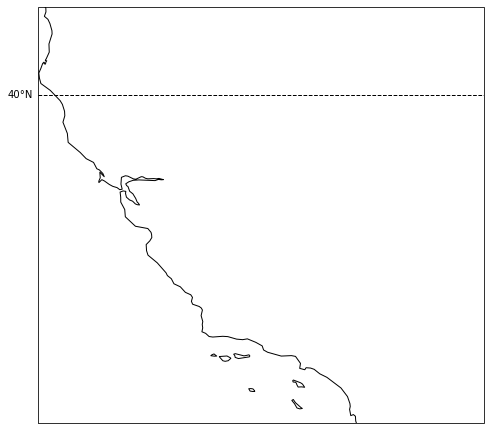

In [8]:
df_small = df[df.date == '2010-01']
lon, lat = np.meshgrid(df_small.lon, df_small.lat)
ws_direction = np.arctan2(df_small['v'],df_small['u'])

ws_daily_avg = np.nanmean(df_small.wspd, axis=0)
ws_daily_avg = df_small.wspd

ws = np.array(np.sqrt(df_small['u']**2+df_small['v']**2))
ws2 = []
for i,val in enumerate(df_small.wspd):
  x = np.zeros(df_small.shape[0])
  x[i] = val 
  ws2.append(x)

ws2 = np.meshgrid(ws, ws)

# plot
fig = plt.figure(figsize=(8,15)) 
ax = plt.axes(projection=ccrs.PlateCarree())

# zoom in to CA
ax.set_extent([-124.4, -114.2, 32.5, 42], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m', linewidth=1)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-65,-60,-50,-40,-30])
gl.ylocator = mticker.FixedLocator([30,40,50,60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size':10, 'color':'black'}
gl.ylabel_style = {'size':10, 'color':'black'}

# wind speed
clevs = np.arange(0,14.5,1)
#plt.contourf(lon, lat, ws[0,:,:], clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.contourf(lon, lat, ws, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.title('MERRA-2 Monthly Average 2-meter Wind Speed, Jan 2010', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)

# wind vectors
qv = plt.quiver(lon, lat, df_small['u'], df_small['v'], scale=420, color='k')

In [ ]:
ax2 = plt.subplot(1, 2, 2)
qui = ax2.quiver(X, Y, U, V)
plt.quiverkey(qui, 0.9, 1.05, 1, '1 m/s',labelpos='E',fontproperties={'weight': 'bold'})

plt.show()

In [9]:
ws

array([0.76539337, 0.40362198, 0.6050026 , ..., 0.45390679, 0.36520945,
       1.75452857])

Trying to plot the houly data

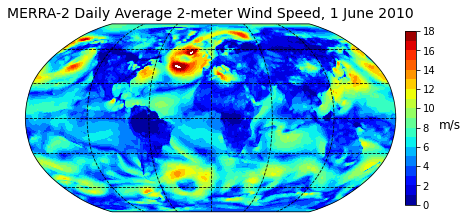

In [94]:
from netCDF4 import Dataset
data = Dataset(os.path.join(gdrive_path, 'data/merra2_data/raw_data/hourly/MERRA2_200.tavg1_2d_slv_Nx.20001231.nc4'), mode='r')



# longitude and latitude
lons = data.variables['lon']
lats = data.variables['lat']
lon, lat = np.meshgrid(lons, lats)
# 2-meter eastward wind m/s
U2M = data.variables['U2M']
# 2-meter northward wind m/s
V2M = data.variables['V2M']

# Replace _FillValues with NaNs:
U2M_nans = U2M[:]
V2M_nans = V2M[:]
_FillValueU2M = U2M._FillValue
_FillValueV2M = V2M._FillValue
U2M_nans[U2M_nans == _FillValueU2M] = np.nan
V2M_nans[V2M_nans == _FillValueV2M] = np.nan

# calc wind speed
ws = np.sqrt(U2M_nans**2+V2M_nans**2)

# Calculate wind direction in radians:
ws_direction = np.arctan2(V2M_nans,U2M_nans)

# NOTE: the MERRA-2 file contains hourly data for 24 hours (t=24). To get the daily mean wind speed, take the average of the hourly wind speeds:
ws_daily_avg = np.nanmean(ws, axis=0)

U2M_daily_avg = np.nanmean(U2M_nans, axis=0)
V2M_daily_avg = np.nanmean(V2M_nans, axis=0)
ws_daily_avg_direction = np.arctan2(V2M_daily_avg, U2M_daily_avg)

fig = plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black')

clevs = np.arange(0,19,1)
plt.contourf(lon, lat, ws_daily_avg, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.title('MERRA-2 Daily Average 2-meter Wind Speed, 1 June 2010', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)

# fig.savefig('MERRA2_2m_ws.png', format='png', dpi=120)

/opt/miniconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/miniconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


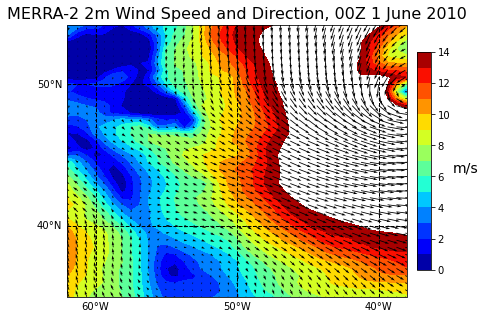

In [95]:
# Set the figure size, projection, and extent
fig = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-62,-38,35,54])
ax.coastlines(resolution="50m",linewidth=1)
# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-65,-60,-50,-40,-30])
gl.ylocator = mticker.FixedLocator([30,40,50,60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size':10, 'color':'black'}
gl.ylabel_style = {'size':10, 'color':'black'}

# Plot windspeed
clevs = np.arange(0,14.5,1)
plt.contourf(lon, lat, ws[0,:,:], clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.title('MERRA-2 2m Wind Speed and Direction, 00Z 1 June 2010', size=16)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('m/s',size=14,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)
# Overlay wind vectors
qv = plt.quiver(lon, lat, U2M_nans[0,:,:], V2M_nans[0,:,:], scale=420, color='k')

In [104]:
# Check out the data feeding this
print(lon)
print("\nndim:")
print(lon.ndim)
# it's also of "masked_array" type

[[-180.    -179.375 -178.75  ...  178.125  178.75   179.375]
 [-180.    -179.375 -178.75  ...  178.125  178.75   179.375]
 [-180.    -179.375 -178.75  ...  178.125  178.75   179.375]
 ...
 [-180.    -179.375 -178.75  ...  178.125  178.75   179.375]
 [-180.    -179.375 -178.75  ...  178.125  178.75   179.375]
 [-180.    -179.375 -178.75  ...  178.125  178.75   179.375]]

ndim:
2


ws is a very diff data object than i thought

In [107]:
ws[0,:,:]

masked_array(
  data=[[1.6832940578460693, 1.6913090944290161, 1.6994885206222534, ...,
         1.6603457927703857, 1.66781485080719, 1.675499439239502],
        [1.903086543083191, 1.9062025547027588, 1.9089640378952026, ...,
         1.8952761888504028, 1.8980985879898071, 1.900482177734375],
        [2.5242483615875244, 2.5190305709838867, 2.5142979621887207, ...,
         2.5389626026153564, 2.5338306427001953, 2.5291762351989746],
        ...,
        [6.860218524932861, 6.876913070678711, 6.892567157745361, ...,
         6.820282459259033, 6.832030296325684, 6.846511363983154],
        [5.527947902679443, 5.540529727935791, 5.554105281829834, ...,
         5.4964728355407715, 5.505919933319092, 5.516500473022461],
        [5.074198246002197, 5.090591907501221, 5.107851505279541, ...,
         5.028520584106445, 5.043224811553955, 5.057738780975342]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, 

Repeat this with monthly data

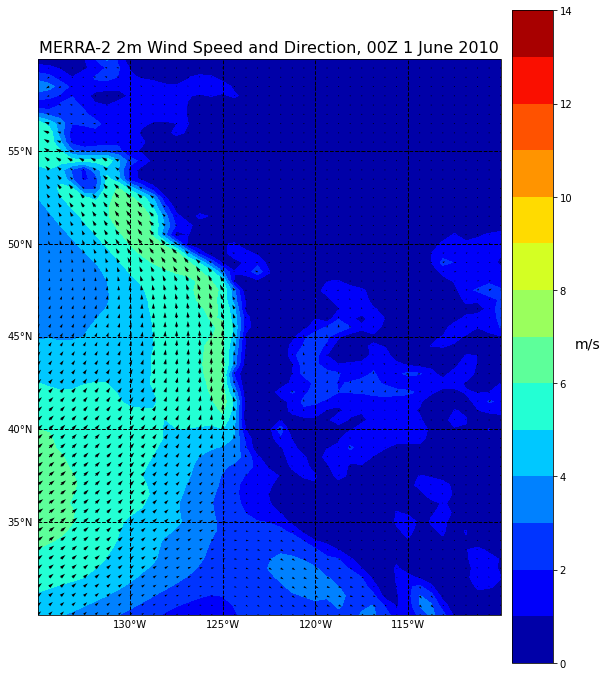

In [34]:
data = Dataset(os.path.join(gdrive_path, 'data/merra2_data/raw_data/monthly/2010/MERRA2_300.tavgM_2d_slv_Nx.201001.nc4'), mode='r')

# lots of data cleaning
# longitude and latitude
lons = data.variables['lon']
lats = data.variables['lat']
lon, lat = np.meshgrid(lons, lats)
# 2-meter eastward wind m/s
U2M = data.variables['U2M']
# 2-meter northward wind m/s
V2M = data.variables['V2M']

# Replace _FillValues with NaNs:
U2M_nans = U2M[:]
V2M_nans = V2M[:]
_FillValueU2M = U2M._FillValue
_FillValueV2M = V2M._FillValue
U2M_nans[U2M_nans == _FillValueU2M] = np.nan
V2M_nans[V2M_nans == _FillValueV2M] = np.nan

# calc wind speed
ws = np.sqrt(U2M_nans**2+V2M_nans**2)

# Calculate wind direction in radians:
ws_direction = np.arctan2(V2M_nans,U2M_nans)

# NOTE: the MERRA-2 file contains hourly data for 24 hours (t=24). To get the daily mean wind speed, take the average of the hourly wind speeds:
ws_daily_avg = np.nanmean(ws, axis=0)

U2M_daily_avg = np.nanmean(U2M_nans, axis=0)
V2M_daily_avg = np.nanmean(V2M_nans, axis=0)
ws_daily_avg_direction = np.arctan2(V2M_daily_avg, U2M_daily_avg)



# Set the figure size, projection, and extent
fig = plt.figure(figsize=(10,15))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([lonmin, lonmax, latmin, latmax], crs=ccrs...)
# ax.set_extent([-62,-38,35,54])
# ax.set_extent([-124.4, -114.2, 32.5, 42]) # zoom in to ca
# p = ccrs.LambertConformal(central_longitude=262.5, central_latitude=38.5, standard_parallels=(38.5, 38.5))
# ax = plt.axes(projection=p)
# ax.set_extent([-140, -60, 20, 70], crs=ccrs.PlateCarree())
ax.set_extent([-135, -110, 30, 60], crs=ccrs.PlateCarree())


ax.coastlines(resolution="50m",linewidth=1)
# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = True
# gl.xlocator = mticker.FixedLocator([-65,-60,-50,-40,-30])
# gl.ylocator = mticker.FixedLocator([30,40,50,60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size':10, 'color':'black'}
gl.ylabel_style = {'size':10, 'color':'black'}

# Plot windspeed
clevs = np.arange(0,14.5,1)
plt.contourf(lon, lat, ws[0,:,:], clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.title('MERRA-2 2m Wind Speed and Direction, 00Z 1 June 2010', size=16)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('m/s',size=14,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)
# Overlay wind vectors
qv = plt.quiver(lon, lat, U2M_nans[0,:,:], V2M_nans[0,:,:], scale=420, color='k')

In [45]:
data = Dataset(os.path.join(gdrive_path, 'data/merra2_data/raw_data/monthly/2010/MERRA2_300.tavgM_2d_slv_Nx.201001.nc4'), mode='r')

# lots of data cleaning
# longitude and latitude
lons = data.variables['lon']
lats = data.variables['lat']
lon, lat = np.meshgrid(lons, lats)
# 2-meter eastward wind m/s
U2M = data.variables['U2M']
# 2-meter northward wind m/s
V2M = data.variables['V2M']

# Replace _FillValues with NaNs:
U2M_nans = U2M[:]
V2M_nans = V2M[:]
_FillValueU2M = U2M._FillValue
_FillValueV2M = V2M._FillValue
U2M_nans[U2M_nans == _FillValueU2M] = np.nan
V2M_nans[V2M_nans == _FillValueV2M] = np.nan

# calc wind speed
ws = np.sqrt(U2M_nans**2+V2M_nans**2)

# Calculate wind direction in radians:
ws_direction = np.arctan2(V2M_nans,U2M_nans)

# NOTE: the MERRA-2 file contains hourly data for 24 hours (t=24). To get the daily mean wind speed, take the average of the hourly wind speeds:
ws_daily_avg = np.nanmean(ws, axis=0)

U2M_daily_avg = np.nanmean(U2M_nans, axis=0)
V2M_daily_avg = np.nanmean(V2M_nans, axis=0)
ws_daily_avg_direction = np.arctan2(V2M_daily_avg, U2M_daily_avg)

# Set the figure size, projection, and extent
fig = plt.figure(figsize=(10,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-135, -110, 30, 60], crs=ccrs.PlateCarree())


from cartopy.feature import NaturalEarthFeature
states = NaturalEarthFeature(category="cultural", scale="50m",
                             facecolor="none",
                             name="admin_1_states_provinces_shp")

ax.add_feature(states, linewidth=.5, edgecolor="black")

HTTPError: HTTP Error 403: Forbidden

<Figure size 720x1080 with 1 Axes>

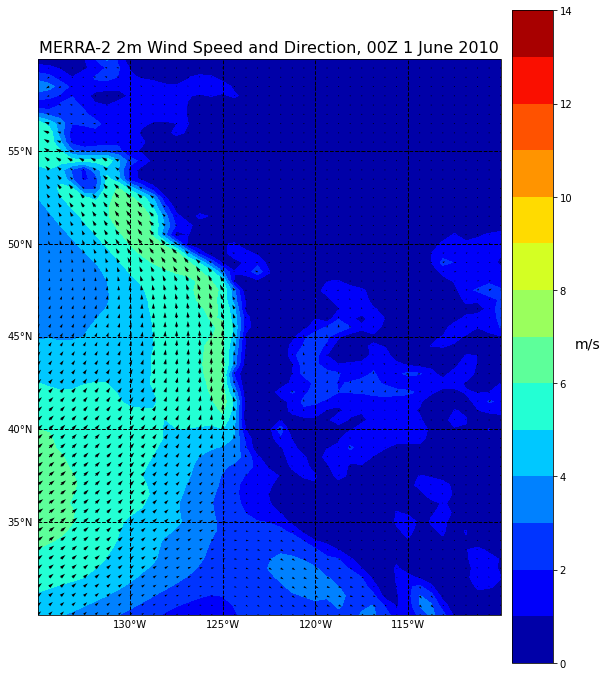

In [46]:
data = Dataset(os.path.join(gdrive_path, 'data/merra2_data/raw_data/monthly/2010/MERRA2_300.tavgM_2d_slv_Nx.201001.nc4'), mode='r')

# lots of data cleaning
# longitude and latitude
lons = data.variables['lon']
lats = data.variables['lat']
lon, lat = np.meshgrid(lons, lats)
# 2-meter eastward wind m/s
U2M = data.variables['U2M']
# 2-meter northward wind m/s
V2M = data.variables['V2M']

# Replace _FillValues with NaNs:
U2M_nans = U2M[:]
V2M_nans = V2M[:]
_FillValueU2M = U2M._FillValue
_FillValueV2M = V2M._FillValue
U2M_nans[U2M_nans == _FillValueU2M] = np.nan
V2M_nans[V2M_nans == _FillValueV2M] = np.nan

# calc wind speed
ws = np.sqrt(U2M_nans**2+V2M_nans**2)

# Calculate wind direction in radians:
ws_direction = np.arctan2(V2M_nans,U2M_nans)

# NOTE: the MERRA-2 file contains hourly data for 24 hours (t=24). To get the daily mean wind speed, take the average of the hourly wind speeds:
ws_daily_avg = np.nanmean(ws, axis=0)

U2M_daily_avg = np.nanmean(U2M_nans, axis=0)
V2M_daily_avg = np.nanmean(V2M_nans, axis=0)
ws_daily_avg_direction = np.arctan2(V2M_daily_avg, U2M_daily_avg)



# Set the figure size, projection, and extent
fig = plt.figure(figsize=(10,15))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([lonmin, lonmax, latmin, latmax], crs=ccrs...)
# ax.set_extent([-62,-38,35,54])
# ax.set_extent([-124.4, -114.2, 32.5, 42]) # zoom in to ca
# p = ccrs.LambertConformal(central_longitude=262.5, central_latitude=38.5, standard_parallels=(38.5, 38.5))
# ax = plt.axes(projection=p)
# ax.set_extent([-140, -60, 20, 70], crs=ccrs.PlateCarree())
ax.set_extent([-135, -110, 30, 60], crs=ccrs.PlateCarree())



# Download and add the states and coastlines
# states = NaturalEarthFeature(category="cultural", scale="50m",
#                              facecolor="none",
#                              name="admin_1_states_provinces_shp")
# ax.add_feature(states, linewidth=.5, edgecolor="black")
ax.coastlines(resolution="50m",linewidth=1)

# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = True
# gl.xlocator = mticker.FixedLocator([-65,-60,-50,-40,-30])
# gl.ylocator = mticker.FixedLocator([30,40,50,60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size':10, 'color':'black'}
gl.ylabel_style = {'size':10, 'color':'black'}

# Plot windspeed
clevs = np.arange(0,14.5,1)
plt.contourf(lon, lat, ws[0,:,:], clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.title('MERRA-2 2m Wind Speed and Direction, 00Z 1 June 2010', size=16)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('m/s',size=14,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)
# Overlay wind vectors
qv = plt.quiver(lon, lat, U2M_nans[0,:,:], V2M_nans[0,:,:], scale=420, color='k')

Best plot so far, but try to not plot anything but CA

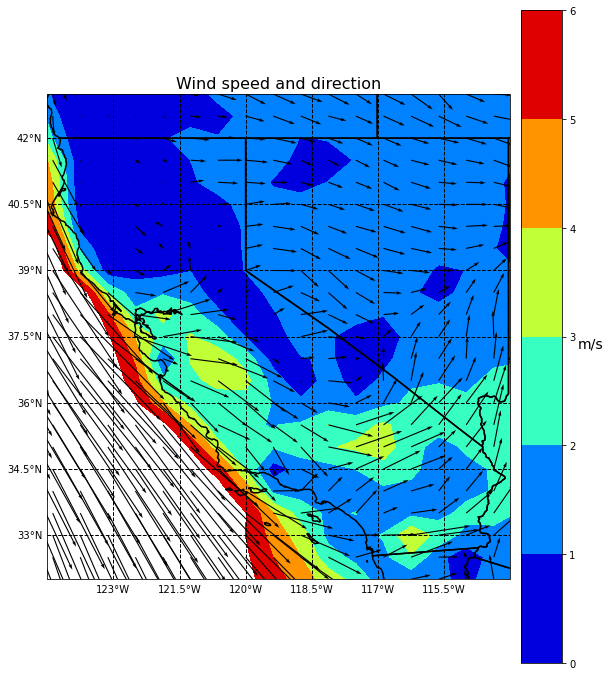

In [107]:
import cartopy.feature as cfeature

# data = Dataset(os.path.join(gdrive_path, 'data/merra2_data/raw_data/monthly/2010/MERRA2_300.tavgM_2d_slv_Nx.201001.nc4'), mode='r')
data = Dataset(os.path.join(gdrive_path, 'data/merra2_data/raw_data/monthly/2010/MERRA2_300.tavgM_2d_slv_Nx.201006.nc4'), mode='r')

# lots of data cleaning
# longitude and latitude
lons = data.variables['lon']
lats = data.variables['lat']
lon, lat = np.meshgrid(lons, lats)
# 2-meter eastward wind m/s
U2M = data.variables['U2M']
# 2-meter northward wind m/s
V2M = data.variables['V2M']

# Replace _FillValues with NaNs:
U2M_nans = U2M[:]
V2M_nans = V2M[:]
_FillValueU2M = U2M._FillValue
_FillValueV2M = V2M._FillValue
U2M_nans[U2M_nans == _FillValueU2M] = np.nan
V2M_nans[V2M_nans == _FillValueV2M] = np.nan

# calc wind speed
ws = np.sqrt(U2M_nans**2+V2M_nans**2)

# Calculate wind direction in radians:
ws_direction = np.arctan2(V2M_nans,U2M_nans)

# NOTE: the MERRA-2 file contains hourly data for 24 hours (t=24). To get the daily mean wind speed, take the average of the hourly wind speeds:
ws_daily_avg = np.nanmean(ws, axis=0)

U2M_daily_avg = np.nanmean(U2M_nans, axis=0)
V2M_daily_avg = np.nanmean(V2M_nans, axis=0)
ws_daily_avg_direction = np.arctan2(V2M_daily_avg, U2M_daily_avg)



# Set the figure size, projection, and extent
fig = plt.figure(figsize=(10,15))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([lonmin, lonmax, latmin, latmax], crs=ccrs...)
# ax.set_extent([-124.4, -114.2, 32.5, 42]) # zoom in to ca
ax.set_extent([-124.5, -114, 32, 43], crs=ccrs.PlateCarree())



# Download and add the states and coastlines
ax.add_feature(cfeature.STATES.with_scale('10m'), zorder=3, linewidth=1.5, edgecolor='k')
ax.coastlines(resolution="50m",linewidth=1)

# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = True
# gl.xlocator = mticker.FixedLocator([-65,-60,-50,-40,-30])
# gl.ylocator = mticker.FixedLocator([30,40,50,60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size':10, 'color':'black'}
gl.ylabel_style = {'size':10, 'color':'black'}

# Plot windspeed
# clevs = np.arange(0,14.5,1)
clevs = np.arange(0,7,1)
plt.contourf(lon, lat, ws[0,:,:], clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.title('Wind speed and direction', size=16)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('m/s',size=14,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)

# Overlay wind vectors
# qv = plt.quiver(lon, lat, U2M_nans[0,:,:], V2M_nans[0,:,:], scale=420, color='k')
qv = plt.quiver(lon, lat, U2M_nans[0,:,:], V2M_nans[0,:,:], scale=30, color='k')

/opt/miniconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/miniconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


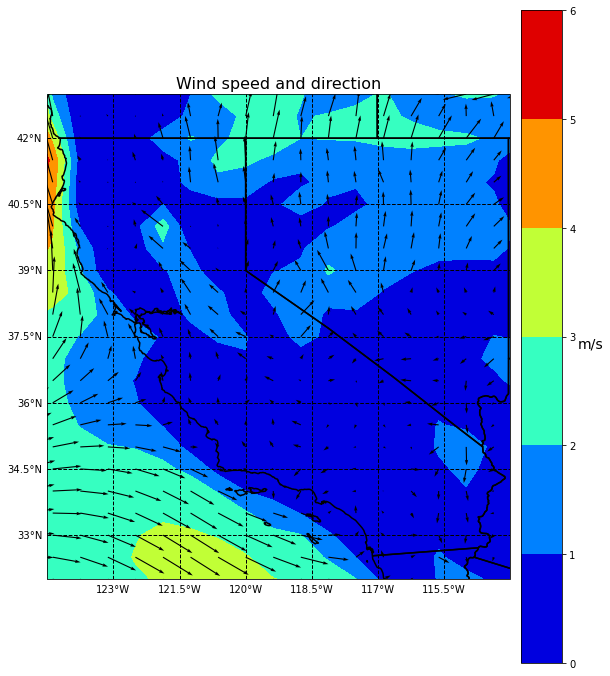

In [106]:
import cartopy.feature as cfeature

data = Dataset(os.path.join(gdrive_path, 'data/merra2_data/raw_data/monthly/2010/MERRA2_300.tavgM_2d_slv_Nx.201001.nc4'), mode='r')

# lots of data cleaning
# longitude and latitude
lons = data.variables['lon']
lats = data.variables['lat']
lon, lat = np.meshgrid(lons, lats)
# 2-meter eastward wind m/s
U2M = data.variables['U2M']
# 2-meter northward wind m/s
V2M = data.variables['V2M']

# Replace _FillValues with NaNs:
U2M_nans = U2M[:]
V2M_nans = V2M[:]
_FillValueU2M = U2M._FillValue
_FillValueV2M = V2M._FillValue
U2M_nans[U2M_nans == _FillValueU2M] = np.nan
V2M_nans[V2M_nans == _FillValueV2M] = np.nan

# calc wind speed
ws = np.sqrt(U2M_nans**2+V2M_nans**2)

# Calculate wind direction in radians:
ws_direction = np.arctan2(V2M_nans,U2M_nans)

# NOTE: the MERRA-2 file contains hourly data for 24 hours (t=24). To get the daily mean wind speed, take the average of the hourly wind speeds:
ws_daily_avg = np.nanmean(ws, axis=0)

U2M_daily_avg = np.nanmean(U2M_nans, axis=0)
V2M_daily_avg = np.nanmean(V2M_nans, axis=0)
ws_daily_avg_direction = np.arctan2(V2M_daily_avg, U2M_daily_avg)



# Set the figure size, projection, and extent
fig = plt.figure(figsize=(10,15))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([lonmin, lonmax, latmin, latmax], crs=ccrs...)
# ax.set_extent([-124.4, -114.2, 32.5, 42]) # zoom in to ca
ax.set_extent([-124.5, -114, 32, 43], crs=ccrs.PlateCarree())



# Download and add the states and coastlines
ax.add_feature(cfeature.STATES.with_scale('10m'), zorder=3, linewidth=1.5, edgecolor='k')
ax.coastlines(resolution="50m",linewidth=1)

# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = True
# gl.xlocator = mticker.FixedLocator([-65,-60,-50,-40,-30])
# gl.ylocator = mticker.FixedLocator([30,40,50,60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size':10, 'color':'black'}
gl.ylabel_style = {'size':10, 'color':'black'}

# Plot windspeed
# clevs = np.arange(0,14.5,1)
clevs = np.arange(0,7,1)
plt.contourf(lon, lat, ws[0,:,:], clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.title('Wind speed and direction', size=16)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('m/s',size=14,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)

# Overlay wind vectors
# qv = plt.quiver(lon, lat, U2M_nans[0,:,:], V2M_nans[0,:,:], scale=420, color='k')
qv = plt.quiver(lon, lat, U2M_nans[0,:,:], V2M_nans[0,:,:], scale=42, color='k')

In [101]:
lons.shape

(576,)

In [98]:
V2M_nans.shape

(1, 361, 576)

In [99]:
ws_direction.shape

(1, 361, 576)

/opt/miniconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/miniconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


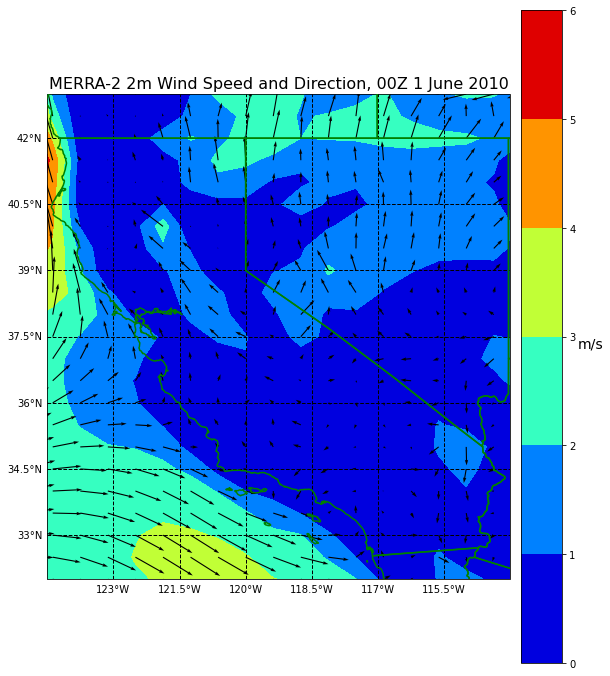

In [93]:
import cartopy.feature as cfeature

data = Dataset(os.path.join(gdrive_path, 'data/merra2_data/raw_data/monthly/2010/MERRA2_300.tavgM_2d_slv_Nx.201001.nc4'), mode='r')

# lots of data cleaning
# longitude and latitude
lons = data.variables['lon']
lats = data.variables['lat']
lon, lat = np.meshgrid(lons, lats)
# 2-meter eastward wind m/s
U2M = data.variables['U2M']
# 2-meter northward wind m/s
V2M = data.variables['V2M']

# Replace _FillValues with NaNs:
U2M_nans = U2M[:]
V2M_nans = V2M[:]
_FillValueU2M = U2M._FillValue
_FillValueV2M = V2M._FillValue
U2M_nans[U2M_nans == _FillValueU2M] = np.nan
V2M_nans[V2M_nans == _FillValueV2M] = np.nan

# calc wind speed
ws = np.sqrt(U2M_nans**2+V2M_nans**2)

# Calculate wind direction in radians:
ws_direction = np.arctan2(V2M_nans,U2M_nans)

# NOTE: the MERRA-2 file contains hourly data for 24 hours (t=24). To get the daily mean wind speed, take the average of the hourly wind speeds:
ws_daily_avg = np.nanmean(ws, axis=0)

U2M_daily_avg = np.nanmean(U2M_nans, axis=0)
V2M_daily_avg = np.nanmean(V2M_nans, axis=0)
ws_daily_avg_direction = np.arctan2(V2M_daily_avg, U2M_daily_avg)



# Set the figure size, projection, and extent
fig = plt.figure(figsize=(10,15))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([lonmin, lonmax, latmin, latmax], crs=ccrs...)
# ax.set_extent([-124.4, -114.2, 32.5, 42]) # zoom in to ca
ax.set_extent([-124.5, -114, 32, 43], crs=ccrs.PlateCarree())



# Download and add the states and coastlines
ax.add_feature(cfeature.STATES.with_scale('10m'), zorder=3, linewidth=1.5, edgecolor='g')
ax.coastlines(resolution="50m",linewidth=1)

# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = True
# gl.xlocator = mticker.FixedLocator([-65,-60,-50,-40,-30])
# gl.ylocator = mticker.FixedLocator([30,40,50,60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size':10, 'color':'black'}
gl.ylabel_style = {'size':10, 'color':'black'}

# Plot windspeed
# clevs = np.arange(0,14.5,1)
clevs = np.arange(0,7,1)
plt.contourf(lon, lat, ws[0,:,:], clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.title('MERRA-2 2m Wind Speed and Direction, 00Z 1 June 2010', size=16)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('m/s',size=14,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)

# Overlay wind vectors
# qv = plt.quiver(lon, lat, U2M_nans[0,:,:], V2M_nans[0,:,:], scale=420, color='k')
qv = plt.quiver(lon, lat, U2M_nans[0,:,:], V2M_nans[0,:,:], scale=42, color='k')

Trying to filter teh dataset

In [94]:
# read in ca lat/lon data 
ca_zips = pd.read_parquet(os.path.join(gdrive_path, 'data/merra2_data/output/wind_2010.parquet'))
ca_zips

,lat,lon,ZCTA10,u,v,wdir,wspd,year_month
0,37.465,-117.936,89010,0.554216,0.527893,43.606529,0.765393,201001
1,35.396,-116.322,89019,-0.397274,-0.071303,190.175201,0.403622,201001
2,36.161,-116.139,89060,-0.601148,0.068186,173.528778,0.605003,201001
3,35.957,-115.897,89061,-0.666245,-0.261100,201.400101,0.715580,201001
4,39.520,-120.032,89439,0.237047,0.868078,74.726532,0.899861,201001
...,...,...,...,...,...,...,...,...
19591,39.061,-120.210,96145,0.788249,0.910536,49.117321,1.204331,201012
19592,39.149,-120.248,96146,0.788249,0.910536,49.117321,1.204331,201012
19593,39.236,-120.062,96148,0.788249,0.910536,49.117321,1.204331,201012
19594,38.732,-120.033,96150,0.219277,0.473358,65.144707,0.521680,201012


In [96]:
data.variables['lon']

<class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    long_name: longitude
    units: degrees_east
    vmax: 1000000000000000.0
    vmin: -1000000000000000.0
    valid_range: [-1.e+15  1.e+15]
unlimited dimensions: 
current shape = (576,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [65]:
import netCDF4 as nc
data = Dataset(os.path.join(gdrive_path, 'data/merra2_data/raw_data/monthly/2010/MERRA2_300.tavgM_2d_slv_Nx.201001.nc4'), mode='r')

def make_subsets(data, ranges):
    """
    Inputs:
      variables: dict with key: var name, value: netCDF variable
      ranges: dict with key: dim name, value: 2-tuple of (start, stop) indices
    Returns:
      variables subsetted according to the supplied ranges, in same format as 
      the input variables dictionary
    """
    subsets = {}
    for varname, v in data.variables.items():
        subset_args = []
        if v.shape:
            for size, dim in zip(v.shape, v.dimensions):
                if dim in ranges:
                    subset_args.append(slice(*ranges[dim]))
                else:
                    subset_args.append(slice(0, size))
            print(subset_args)
            subsets[varname] = v.__getitem__(subset_args)
        else:
            # scalar                                                                                
            subsets[varname] = v
    return subsets



# ncObject = nc.Dataset('somefile.nc')
data


# start and end values for every dimension we want to subset                                        
# (as usual, end value is the index AFTER the last element wanted)         
# # ax.set_extent([lonmin, lonmax, latmin, latmax], crs=ccrs...)
# ax.set_extent([-124.4, -114.2, 32.5, 42]) # zoom in to ca
# ax.set_extent([-124.5, -114, 32, 43], crs=ccrs.PlateCarree())                         
ranges = {'lon': (-125, -115), 'lat': (31, 43)}

subsets = make_subsets(data, ranges)

# for varname, v in subsets.items():
#     print(varname, v.shape)

subsets

[slice(-125, -115, None)]
[slice(31, 43, None)]
[slice(0, 1, None)]
[slice(0, 1, None), slice(31, 43, None), slice(-125, -115, None)]
[slice(0, 1, None), slice(31, 43, None), slice(-125, -115, None)]
[slice(0, 1, None), slice(31, 43, None), slice(-125, -115, None)]


/var/folders/mp/gc4psx7d21v2d969fdlnvpmm0000gn/T/ipykernel_86332/1267642710.py:23: UserWarning: WARNING: valid_range not used since it
cannot be safely cast to variable data type
  subsets[varname] = v.__getitem__(subset_args)


[slice(0, 1, None), slice(31, 43, None), slice(-125, -115, None)]
[slice(0, 1, None), slice(31, 43, None), slice(-125, -115, None)]
[slice(0, 1, None), slice(31, 43, None), slice(-125, -115, None)]
[slice(0, 1, None), slice(31, 43, None), slice(-125, -115, None)]
[slice(0, 1, None), slice(31, 43, None), slice(-125, -115, None)]
[slice(0, 1, None), slice(31, 43, None), slice(-125, -115, None)]
[slice(0, 1, None), slice(31, 43, None), slice(-125, -115, None)]
[slice(0, 1, None), slice(31, 43, None), slice(-125, -115, None)]
[slice(0, 1, None), slice(31, 43, None), slice(-125, -115, None)]
[slice(0, 1, None), slice(31, 43, None), slice(-125, -115, None)]
[slice(0, 1, None), slice(31, 43, None), slice(-125, -115, None)]
[slice(0, 1, None), slice(31, 43, None), slice(-125, -115, None)]
[slice(0, 1, None), slice(31, 43, None), slice(-125, -115, None)]
[slice(0, 1, None), slice(31, 43, None), slice(-125, -115, None)]
[slice(0, 1, None), slice(31, 43, None), slice(-125, -115, None)]
[slice(0, 

{'lon': masked_array(data=[101.875, 102.5  , 103.125, 103.75 , 104.375, 105.   ,
                    105.625, 106.25 , 106.875, 107.5  ],
              mask=False,
        fill_value=1e+20),
 'lat': masked_array(data=[-74.5, -74. , -73.5, -73. , -72.5, -72. , -71.5, -71. ,
                    -70.5, -70. , -69.5, -69. ],
              mask=False,
        fill_value=1e+20),
 'time': masked_array(data=[0],
              mask=False,
        fill_value=999999,
             dtype=int32),
 'CLDPRS': masked_array(
   data=[[[58621.266, 58597.74 , 58603.26 , 58330.992, 58259.277,
           58175.71 , 58073.8  , 57636.715, 57445.06 , 57300.887],
          [57733.81 , 57673.676, 57231.414, 57196.105, 57173.293,
           57170.68 , 56992.94 , 56903.71 , 56793.42 , 57149.902],
          [57183.086, 56591.46 , 56487.85 , 56405.848, 56089.938,
           56508.31 , 56393.457, 56381.895, 56444.273, 56524.38 ],
          [55169.81 , 54986.785, 54795.613, 54977.13 , 55277.637,
           55135.465, 

# Wind Direction EDA
- East/West wind speed is cyclical. It blows westward during the winter, and eastward during the summer. North/South is not as cyclical. 
- Overall wind speed is also cyclical. The wind seems to pick up in the summer months, but slow down in winter months. 

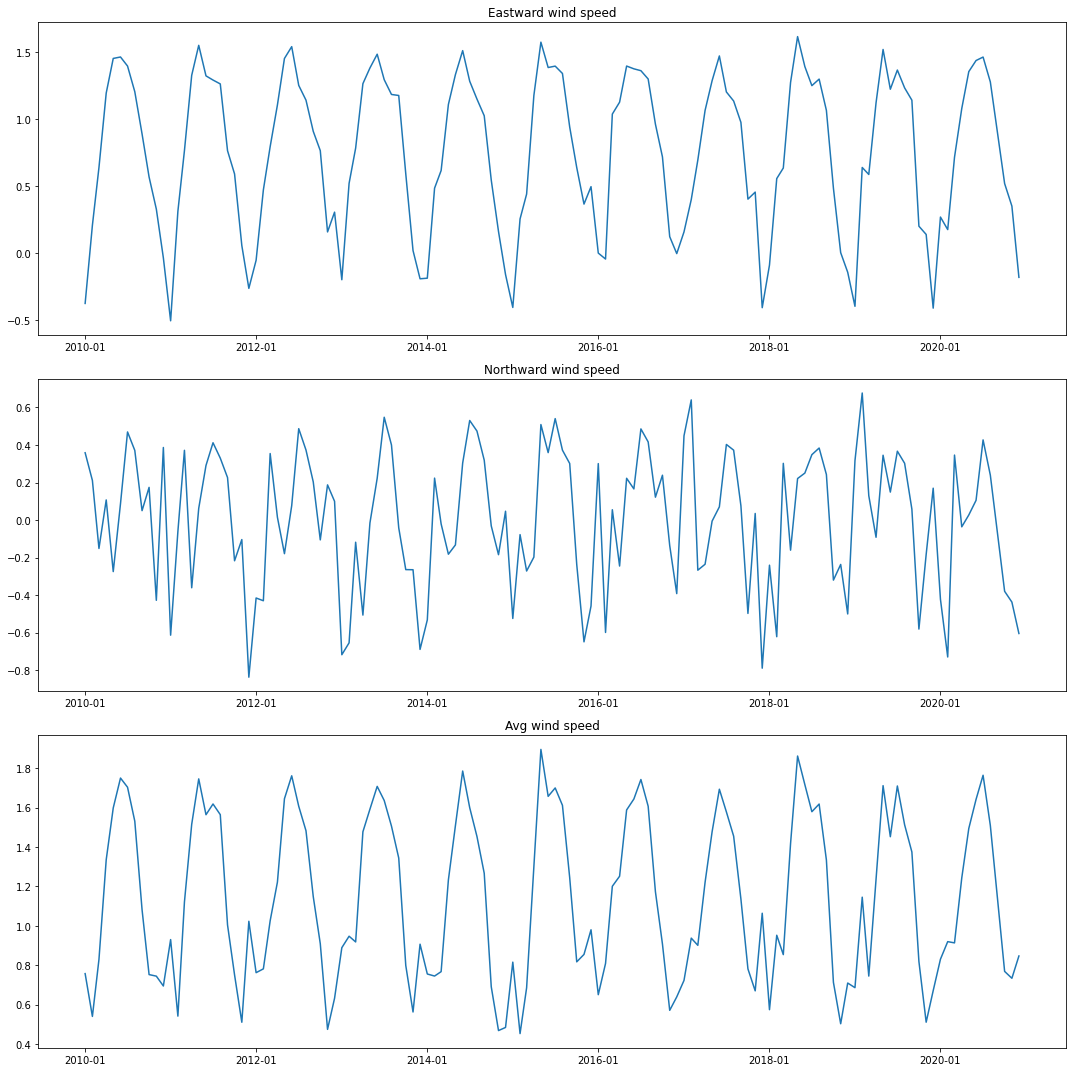

In [ ]:
df_plot = df.groupby('date').agg(**{
    'u': ('u', 'mean'), 
    'v': ('v', 'mean'), 
    'wdir': ('wdir', 'mean'), 
    'wspd': ('wspd', 'mean')})\
    .reset_index()
df_plot['date'] = df_plot.date.map(lambda x: datetime.datetime.strptime(x, '%Y-%m'))
df_plot = df_plot[df_plot['date'] >= '2010-01-01']

fig, ax = plt.subplots(3,1, figsize=(15,15))
myFmt = DateFormatter("%Y-%m")

ax[0].plot(df_plot.date, df_plot.u)
ax[0].set_title('Eastward wind speed')
ax[0].xaxis.set_major_formatter(myFmt)

ax[1].plot(df_plot.date, df_plot.v)
ax[1].set_title('Northward wind speed')
ax[1].xaxis.set_major_formatter(myFmt)

ax[2].plot(df_plot.date, df_plot.wspd)
ax[2].set_title('Avg wind speed')
ax[2].xaxis.set_major_formatter(myFmt)

fig.tight_layout()
print('')